In [1]:
import matplotlib.pyplot as plt
import numpy
import json

classes = ['OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK', '16APSK', '32APSK', '64APSK', '128APSK',
           '16QAM', '32QAM', '64QAM', '128QAM', '256QAM', 'AM-SSB-WC', 'AM-SSB-SC', 'AM-DSB-WC', 'AM-DSB-SC', 'FM',
           'GMSK', 'OQPSK']
snrs = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]

In [2]:
signal_accuracy_f = open('/mnt/c/Users/mavi/AMC/Results/RadioMl/coms_signal.json')
signal_accuracy = json.load(signal_accuracy_f)


In [3]:
output_path ="/Users/mariavictoriadacostarivas/Documents/GMR/AMC_transformers/Results/RadioMl/"

{'OOK': [4.0,
  3.0,
  4.0,
  7.000000000000001,
  16.0,
  28.999999999999996,
  52.0,
  73.0,
  87.0,
  95.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 '4ASK': [3.0,
  3.0,
  4.0,
  5.0,
  7.000000000000001,
  12.0,
  17.0,
  32.0,
  44.0,
  64.0,
  75.0,
  82.0,
  90.0,
  97.0,
  99.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 '8ASK': [2.0,
  4.0,
  4.0,
  8.0,
  12.0,
  20.0,
  28.999999999999996,
  50.0,
  70.0,
  76.0,
  75.0,
  82.0,
  95.0,
  98.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 'BPSK': [11.0,
  10.0,
  9.0,
  8.0,
  11.0,
  16.0,
  43.0,
  93.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0],
 'QPSK': [3.0,
  4.0,
  6.0,
  4.0,

In [4]:
sensitivity = []
for k,val in signal_accuracy.items():
    for i  in range(len(val)):
        if val[i] >= 90:
            sensitivity.append(snrs[i])
            break
        elif i == len(val) - 1:
            sensitivity.append(30)


In [5]:
sensitivity

[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 8, 30, 4, 6, -8, -2, 0]

In [4]:
overall_acc_f = open('/mnt/c/Users/mavi/AMC/Results/RadioMl/coms_acc.json')
overall_accuracy = json.load(overall_acc_f)

In [7]:
for k,val in overall_accuracy.items():
    overall_accuracy[k] = val*100

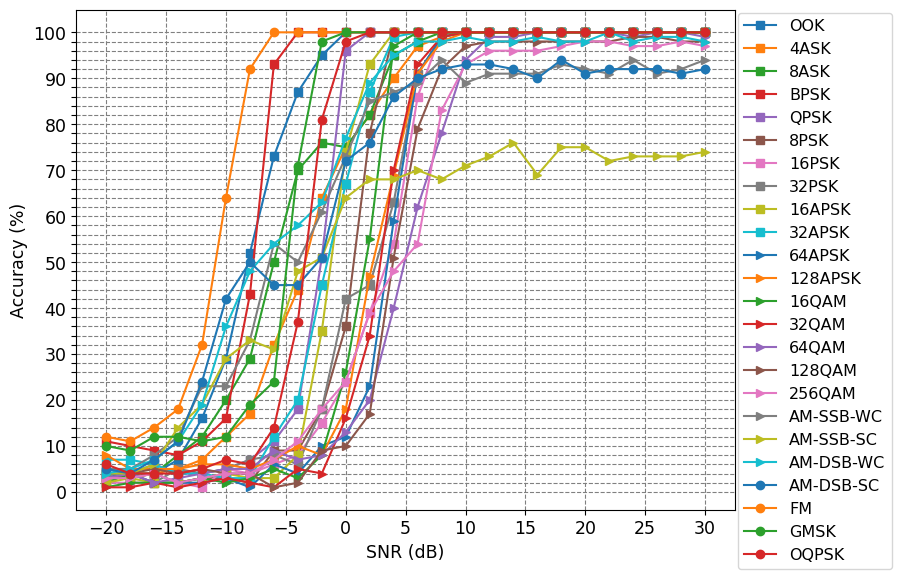

In [8]:
f = plt.figure()
f.set_figwidth(8.5)
f.set_figheight(6.5)
ticks = []
plt.rcParams.update({'font.size': 12.5})
a = numpy.arange(0, 102, 2)
for i in a:
    if i %10 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")
for i in range(len(classes)):
    if i+1 > 20:
        plt.plot(snrs, signal_accuracy[classes[i]], marker='o')
    elif i+1 > 10:
        plt.plot(snrs, signal_accuracy[classes[i]], marker='>')
    else:
        plt.plot(snrs, signal_accuracy[classes[i]], marker='s')

plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.legend(classes, loc='upper right', bbox_to_anchor=(1.25,1.01), fontsize=11.5)
plt.yticks(a,ticks)
plt.xticks(numpy.arange(-20,35,5))
plt.xlabel("SNR (dB)")
plt.ylabel("Accuracy (%)")
#plt.savefig(output_path + 'signal_accuracy.png', bbox_inches='tight')
plt.show()

In [18]:
overall_accuracy

{'-20': 4.6186031541680075,
 '-18': 4.594901769767819,
 '-16': 5.2315334081076745,
 '-14': 6.2652166856029865,
 '-12': 9.308145636554451,
 '-10': 14.415954415954415,
 '-8': 19.692157341803078,
 '-6': 27.761557177615572,
 '-4': 34.29959647533558,
 '-2': 45.666203741524384,
 '0': 57.47747747747748,
 '2': 69.02288589514689,
 '4': 82.184655396619,
 '6': 91.21971252566735,
 '8': 95.8374303507047,
 '10': 97.25614720729523,
 '12': 97.84937510144456,
 '14': 97.86494136676102,
 '16': 97.54285714285714,
 '18': 98.15178279358848,
 '20': 98.0172273687632,
 '22': 97.89100861305643,
 '24': 97.98340248962656,
 '26': 97.96714912993983,
 '28': 98.02253018883216,
 '30': 98.04018040180402}

In [8]:
snr_10 = (overall_accuracy['0'] + overall_accuracy['2'] + overall_accuracy['4']  + overall_accuracy['6'] + overall_accuracy['8'] + overall_accuracy['10'])/6

In [23]:
## from -10:5:30
GGCNN= [0.3264, 0.336,0.34, 0.3528,0.3728, 0.4088,0.44,0.491,0.5464, 0.6 , 0.6736, 0.7288, 0.78,0.841, 0.8872, 0.9272,0.9504,0.9704, 0.9784,  0.9888,0.9944]
GGCNN = [a*100 for a in GGCNN]
len(GGCNN)

21

In [9]:
snr_10

82.16638480881844

In [ ]:
SE_MSFN = [0.0415, 0.0415, 0.0483, 0.056,0.0792,  ]

In [18]:
snrs[5:]

[-10,
 -8,
 -6,
 -4,
 -2,
 0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30]

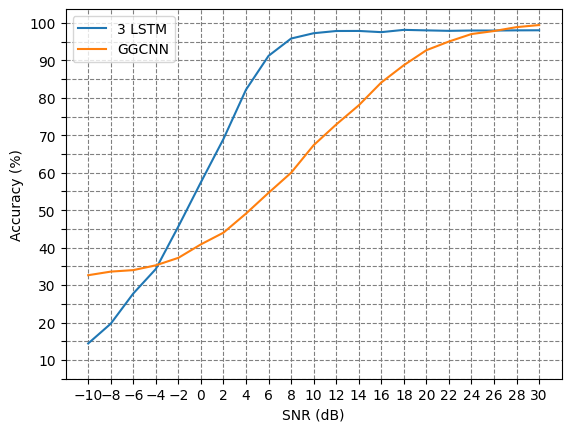

In [27]:
ticks = []
a = numpy.arange(5, 105, 5)
for i in a:
    if i %10 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")
#plt.rcParams['font.family'] = 'Times New Roman'
vals = [v for k,v in overall_accuracy.items()]
plt.plot(snrs[5:],vals[5:])
plt.plot(snrs[5:], GGCNN)
plt.xticks(numpy.arange(-10,32, 2))
plt.yticks(a,ticks)
plt.ylabel('Accuracy (%)')
plt.xlabel('SNR (dB)')
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.legend(["3 LSTM", "GGCNN"])
#plt.savefig(output_path + 'Results/8_signals/sensitivity.png')
plt.show()

In [55]:
sensitivity

[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 8, 30, 4, 6, -8, -2, 0]

In [8]:
sensitivity_radioml = [-2, 6, 2, -2, 2, 6, 10, 12, 4, 4, 8, 8, 6, 8, 20, 14, 30, -6, -2, 0, -2, 30, 2,30]

In [65]:
len(sensitivity_radioml)

24

In [9]:
classes

['OOK',
 '4ASK',
 '8ASK',
 'BPSK',
 'QPSK',
 '8PSK',
 '16PSK',
 '32PSK',
 '16APSK',
 '32APSK',
 '64APSK',
 '128APSK',
 '16QAM',
 '32QAM',
 '64QAM',
 '128QAM',
 '256QAM',
 'AM-SSB-WC',
 'AM-SSB-SC',
 'AM-DSB-WC',
 'AM-DSB-SC',
 'FM',
 'GMSK',
 'OQPSK']

In [10]:
sensitivity_2 = [-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, -8, -2, 0,8, 30, 4, 6 ]
classes_modified = ['OOK',
 '4ASK',
 '8ASK',
 'BPSK',
 'QPSK',
 '8PSK',
 '16PSK',
 '32PSK',
 '16APSK',
 '32APSK',
 '64APSK',
 '128APSK',
 '16QAM',
 '32QAM',
 '64QAM',
 '128QAM',
 '256QAM',
 'FM',
 'GMSK',
 'OQPSK',
 'AM-SSB-WC',
 'AM-SSB-SC',
 'AM-DSB-WC',
 'AM-DSB-SC']

AM-SSB-WC
8
[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 30, 4, 6, -8, -2, 0]
[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 30, 4, 6, -8, -2, 0, 8]
AM-SSB-SC
30
[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 30, 6, -8, -2, 0, 8]
[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 30, 6, -8, -2, 0, 8, 30]
AM-DSB-WC
4
[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 30, 6, -2, 0, 8, 30]
[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 30, 6, -2, 0, 8, 30, 4]
AM-DSB-SC
6
[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 30, 6, -2, 8, 30, 4]
[-2, 4, 4, -6, 0, 4, 8, 6, 2, 4, 6, 6, 4, 6, 10, 8, 10, 30, 6, -2, 8, 30, 4, 6]
['OOK', '4ASK', '8ASK', 'BPSK', 'QPSK', '8PSK', '16PSK', '32PSK', '16APSK', '32APSK', '64APSK', '128APSK', '16QAM', '32QAM', '64QAM', '128QAM', '256QAM', 'FM', 'GMSK', 'OQPSK', 'AM-SSB-WC', 'AM-SSB-SC', 'AM-DSB-WC', 'AM-DSB-SC']


In [13]:
a = numpy.arange(-8, 30, 2)
ticks = []
for i in a:
    if i %4 == 0:
        ticks.append(str(i))
    else:
        ticks.append("")

In [23]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(9,5))
plt.subplots_adjust(bottom=0.3)
plt.plot(classes_modified, sensitivity_2, marker='o', color = '#00BCD4')
plt.plot(classes_modified, sensitivity_radioml, marker='>', color = '#FF5722')
plt.yticks(numpy.arange(-8,30, 2), ticks)
plt.xticks(classes, rotation=50)
plt.xlabel('Modulation')
plt.ylabel('SNR (dB)')
plt.grid(color = "grey", linewidth = "0.8", linestyle = "--")
plt.legend(["LSTM framework: OTA and synthetic", "RadioML authors: synthetic"])
plt.savefig(output_path + 'sensitivity_radioml.png')
#plt.show()